# **Імпортуємо необхідні модулі**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# **Датасет 2d**

###Завантажимо датасет 2d

In [78]:
url_share = 'https://drive.google.com/file/d/1hu3DKzPXCesxw_2CX09X-R2-7GrdH6Ar/view?usp=sharing'
file_id = url_share.split('/')[-2]
url = f'https://drive.usercontent.google.com/download?id={file_id}&export=download&authuser=0'
df_2d = pd.read_csv(url, header=None)
df_2d.head()

,0,1,2
0,0.0,-0.768716,0.460860
1,0.0,2.687848,2.366961
2,0.0,-0.201379,0.470430
3,0.0,0.608496,1.225400
4,0.0,-0.082282,1.137218


###Додамо назви колонок для наглядності

In [33]:
df_2d.columns = ['c_0','c_1','c_2']
df_2d

,c_0,c_1,c_2
0,0.0,-0.768716,0.460860
1,0.0,2.687848,2.366961
2,0.0,-0.201379,0.470430
3,0.0,0.608496,1.225400
4,0.0,-0.082282,1.137218
...,...,...,...
195,1.0,0.629144,4.378584
196,1.0,-0.723824,5.361801
197,1.0,1.346107,2.333476
198,1.0,3.608219,3.411546


### Подивимось на інформацію по датасту

In [54]:
df_2d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       200 non-null    float64
 1   1       200 non-null    float64
 2   2       200 non-null    float64
dtypes: float64(3)
memory usage: 4.8 KB


In [55]:
df_2d.shape

(200, 3)

### Подивимось візуально на дані

**Спочатку приберемо першу колонку, так як вона не інформативна, і навряд вплине на результат**

In [56]:
X = df_2d.iloc[:, [1, 2]].values
X.shape

(200, 2)

**Відобразимо наглядно розподіл даних**

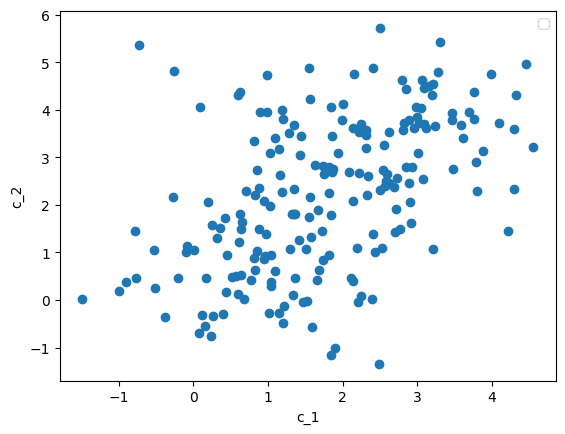

In [57]:
plt.scatter(X[:, 0], X[:, 1])
plt.xlabel('c_1')
plt.ylabel('c_2')
plt.legend()

plt.show()

### Знайдемо оптимальну кількість кластерів


Text(0.5, 0, 'Number of clusters')

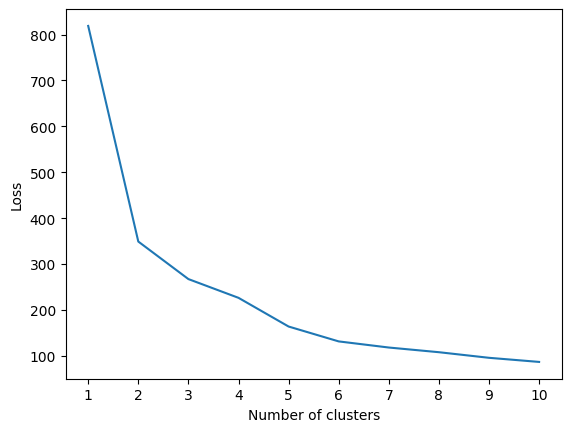

In [58]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', n_init = 'auto', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.xticks(np.arange(1, 11, step=1))
plt.ylabel('Loss')
plt.xlabel('Number of clusters')

**Бачимо що, нахил різко змінюється на позначці 2 та 3. Згідно правила "elbow method" на графіку можна виокремити точку згину (так званий "лікоть"), отже на перший погляд 2 - це оптимальна кількість кластерів, але проведемо експеримент і відобразимо візуально 2 ситуації (2 та 3 кластери)**

### Відобразимо графічно розподіл кластерів, при кількості кластерів 2

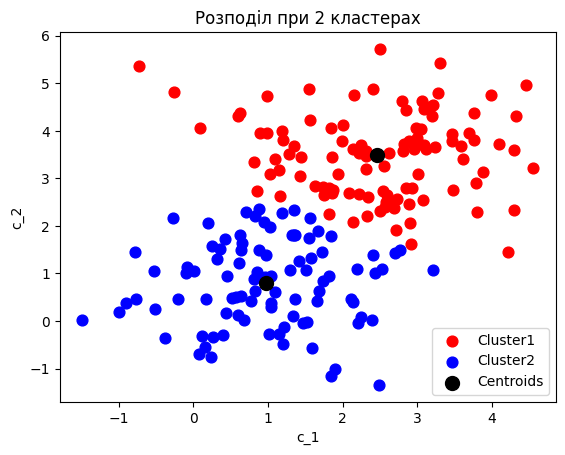

In [76]:
kmeans = KMeans(n_clusters = 2, init = "k-means++", n_init = 'auto', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

plt.scatter( X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 60, c = 'red', label = 'Cluster1')
plt.scatter( X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 60, c = 'blue', label = 'Cluster2')
plt.scatter( kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'black', label = 'Centroids')

plt.title('Розподіл при 2 кластерах')
plt.xlabel('с_1')
plt.ylabel('с_2')
plt.legend()

plt.show()

### Відобразимо графічно розподіл кластерів, при кількості кластерів 3

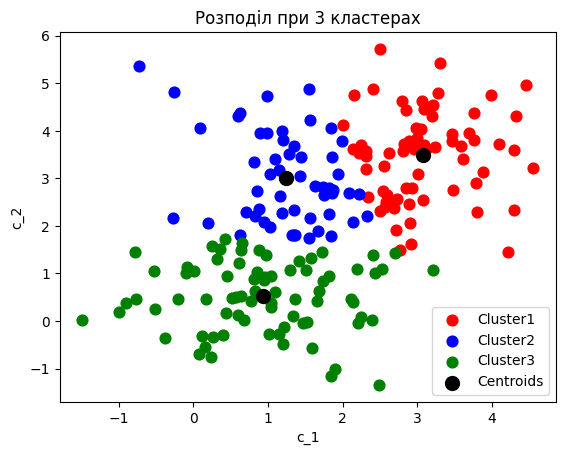

In [75]:
kmeans = KMeans(n_clusters = 3, init = "k-means++", n_init = 'auto', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

plt.scatter( X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 60, c = 'red', label = 'Cluster1')
plt.scatter( X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 60, c = 'blue', label = 'Cluster2')
plt.scatter( X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 60, c = 'green', label = 'Cluster3')
plt.scatter( kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'black', label = 'Centroids')

plt.title('Розподіл при 3 кластерах')
plt.xlabel('с_1')
plt.ylabel('с_2')
plt.legend()

plt.show()

### Висновок

Після візуального відображення бачимо, що ситуація дійсно непроста, і виявити візуально оптимальну кількість кластерів теж важко.

Але довіримось правилу "elbow method" і оберемо результат з 2 кластерами.

# **Датасет mnist**

###Завантажимо атасет mnist

In [48]:
url_share = 'https://drive.google.com/file/d/146bPKVVr6uqJcWp7Lp7PhKDROEAxrIAo/view?usp=sharing'
file_id = url_share.split('/')[-2]
url = f'https://drive.usercontent.google.com/download?id={file_id}&export=download&authuser=0'
df_mnist = pd.read_csv(url, header=None)
df_mnist.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Зобразимо графік поясненої дисперсії від кількості головних компонентів

In [105]:
pca = PCA(.90)
lower_dimensional_data = pca.fit_transform(df_mnist)
pca.n_components_

72

In [106]:
pca = PCA()
pca.fit(df_mnist)
print('Початкова к-сть компонент:', pca.n_components_)

tot = sum(pca.explained_variance_)
print('Підсумовування поясненої дисперсії:', tot)

var_exp = [(i/tot)*100 for i in sorted(pca.explained_variance_, reverse=True)]
print(var_exp[0:5])

cum_var_exp = np.cumsum(var_exp)

Початкова к-сть компонент: 500
Підсумовування поясненої дисперсії: 3217674.9706452885
[10.667998350455798, 8.022852534848944, 5.816812868857918, 5.368817219511498, 4.282229566857984]


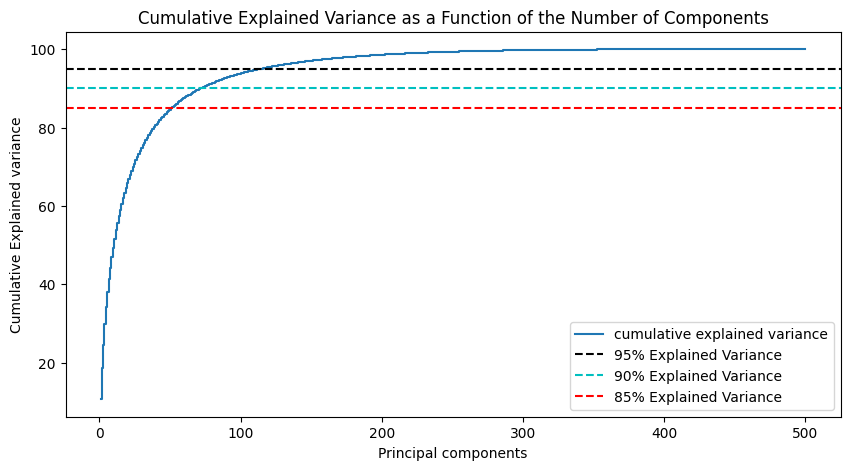

In [107]:
plt.figure(figsize=(10, 5))
plt.step(range(1, 501), cum_var_exp, where='mid',label='cumulative explained variance')
plt.title('Cumulative Explained Variance as a Function of the Number of Components')
plt.ylabel('Cumulative Explained variance')
plt.xlabel('Principal components')
plt.axhline(y = 95, color='k', linestyle='--', label = '95% Explained Variance')
plt.axhline(y = 90, color='c', linestyle='--', label = '90% Explained Variance')
plt.axhline(y = 85, color='r', linestyle='--', label = '85% Explained Variance')
plt.legend(loc='best')
plt.show()

### Знайдемо оптимальну кількість кластерів

In [108]:
X = lower_dimensional_data
y = df_mnist[0]

Text(0.5, 0, 'Number of clusters')

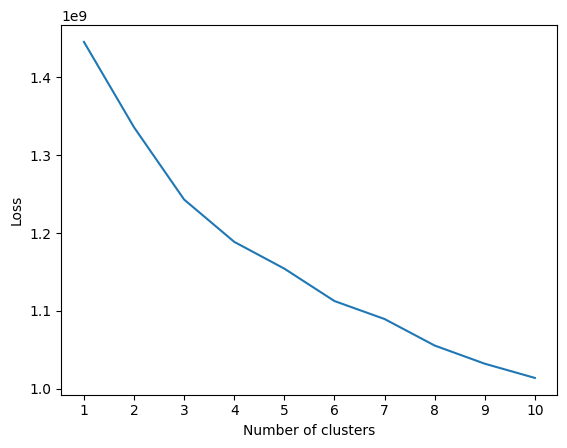

In [116]:
wcss = []
test_clusters = 11
for i in range(1, test_clusters):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', n_init = 'auto', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, test_clusters), wcss)
plt.xticks(np.arange(1, test_clusters, step=1))
plt.ylabel('Loss')
plt.xlabel('Number of clusters')

### Розрахуємо Accuracy, при кількості кластерів 3

In [125]:
kmeans = KMeans(n_clusters = 3, init = "k-means++", n_init = 'auto', random_state = 42)

kmeans.fit(X)

labels = kmeans.labels_

correct_labels = sum(y == labels)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))

print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Result: 110 out of 500 samples were correctly labeled.
Accuracy score: 0.22


### Розрахуємо Accuracy, при кількості кластерів 4

In [128]:
kmeans = KMeans(n_clusters = 4, init = "k-means++", n_init = 'auto', random_state = 42)

kmeans.fit(X)

labels = kmeans.labels_

correct_labels = sum(y == labels)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))

print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Result: 110 out of 500 samples were correctly labeled.
Accuracy score: 0.22


### Висновок

В даній ситуації складно писати висновок, так як успішність отриманої моделі залишає бажати кращого. Показник 0,22 вважаю дуже малим.
Або десь була допущена помилка, або вихідні дані не дуже підлягають кластеризації.